# HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS

##Introduction:
Healthcare Insurance is provided by the insurance companies to the insurance holder to cover his/her medical expenses depending upon the  plan the policy holder selects. The amount depends on the diagnosis done by the doctor . but some holders or insurance providers misuse this and try to file fake claims by giving fake details. According to Govt total medicare increases exponentially due to frauds ,by which the company as well as insurance holder suffer . The approach to this problem is using Machine Learning and Deep Learning Algorithms to detect healthcare frauds.

## Problem Statement
We have to find/detect/predict these claims into fraud provided/filed by the fradulents. Which will save a very huge amount of money from frauds. And also discover the important variables helpful in detecting the behaviour of fraud providers.

## ML formulation of business problem:
This is a binary classification problem , We need to classify whether the data points are  fraudulent or real claims.

## Performance metric:
1. Confusion Matrix : for visualization the reults of TP,TN,FP,FN
2. Precision: 

    1.   The formula to calculate the Precision is TP/(TP+FP). i.e it checks for out of the predicted Positve how many are actual positive and it only care for false positive and not False negaative
    2.   also the insurance companies will try to preserve the coustmer i.e if the fraud claim is classifed into non fraud claim then it ok as they have to reimburse the money but if the Non Fraud Claim classified in Fraud Claim then they might loose the coustmer.

    3. As the data is slightly imbalanced the Precision is a great metrics and .
    4. And from The averaged precision i will be choosing micro-averaged because for imbalance datasets it assigns different wieghts of different classes. 







## Business constraints:
The Misclassification rate must be very low.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


**<font color='Green'>Loading Data</font>** 

In [ ]:
df_inpatient=pd.read_csv("/content/drive/My Drive/CASE Studies/healthcare/archive_fraud/Train_Inpatientdata.csv")
print("The shape of the Inpatient Data:",df_inpatient.shape)
print("The columns of the Inpatient Data are :",df_inpatient.columns)


The shape of the Inpatient Data: (40474, 30)
The columns of the Inpatient Data are : Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')


In [ ]:
df_outpatient=pd.read_csv("/content/drive/My Drive/CASE Studies/healthcare/archive_fraud/Train_Outpatientdata.csv")
print("The shape of the Outpatient Data:",df_outpatient.shape)
print("The columns of the Outpatient Data are :",df_outpatient.columns)

The shape of the Outpatient Data: (517737, 27)
The columns of the Outpatient Data are : Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


In [ ]:
df_beneficiary=pd.read_csv("/content/drive/My Drive/CASE Studies/healthcare/archive_fraud/Train_Beneficiarydata.csv")
print("The shape of the Beneficary Data:",df_beneficiary.shape)
print("The columns of the Beneficary Data are :",df_beneficiary.columns)

The shape of the Beneficary Data: (138556, 25)
The columns of the Beneficary Data are : Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')


In [ ]:
# loading Target File
df_train=pd.read_csv("/content/drive/My Drive/CASE Studies/healthcare/archive_fraud/Train.csv")
print("The shape of the Target file:",df_train.shape)
print("The columns of the Target file are :",df_train.columns)

The shape of the Target file: (5410, 2)
The columns of the Target file are : Index(['Provider', 'PotentialFraud'], dtype='object')


**<font color='Green'>Merging all Data</font>** 

In [ ]:
# Merging Inpatient_data and OutPatient_data
cols=[i for i in df_outpatient.columns if i in df_inpatient.columns ]
df=pd.merge(df_inpatient,df_outpatient,
            left_on=cols,
            right_on=cols,
            how="outer")

# Merging df and Benificiary data
df=pd.merge(df_beneficiary,df,
            on="BeneID",
            how="outer")

# Merging df and target_data
df=pd.merge(df_train,df,
            on="Provider",
            how="outer")
df.head()

,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,PRV51001,No,BENE11727,1930-05-01,NaN,1,1,Y,1,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,NaN,NaN,0.0,NaN,NaN,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PRV51001,No,BENE24646,1943-03-01,NaN,1,1,0,1,440,12,12,1,2,2,2,2,2,1,1,1,2,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,NaN,NaN,0.0,NaN,NaN,78650,51889,V5869,4019,V4581,49320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PRV51001,No,BENE31617,1933-08-01,NaN,2,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,NaN,59970,0.0,NaN,NaN,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRV51001,No,BENE32715,1936-03-01,NaN,1,1,0,1,410,12,12,1,1,1,1,1,1,1,1,2,2,2,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,NaN,78902,0.0,NaN,NaN,78964,V442,5589,2720,33829,25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PRV51001,No,BENE36012,1940-07-01,NaN,1,1,0,1,510,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,2009-07-04,29623,1068.0,2009-07-08,882,29650,2971,3051,V1254,07070,28260,7823,49300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**<font color='Blue'>EDA</font>** 
**<font color='Green'>1.1Checking The Distribution of labels( Imbalance)</font>** 

Percentage of No(No fraud) Labels present is  61.878931085198964 %
Percentage of Yes(Fraud) Labels present is  38.121068914801036 %


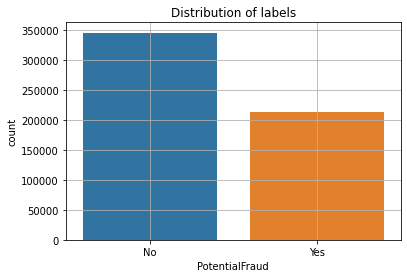

In [ ]:
# Cecking Distribution for whole dataset
#plt.style.use("seaborn-whitegrid")
sns.countplot(df["PotentialFraud"])
plt.title("Distribution of labels")
plt.grid("whitegrid")

print("Percentage of No(No fraud) Labels present is ",(df["PotentialFraud"].value_counts()[0]*100)/df["PotentialFraud"].count(),"%")
print("Percentage of Yes(Fraud) Labels present is ",(df["PotentialFraud"].value_counts()[1]*100)/df["PotentialFraud"].count(),"%")

**Observation**
1. In The whole data there are 345415 non fraud claims, 212796 fraud claim
2. percentage of No class is 61.87%, Yes class is 38.12%


Percentage of No(No fraud) Labels present is  63.43848610883264 %
Percentage of Yes(Fraud) Labels present is  36.56151389116736 %


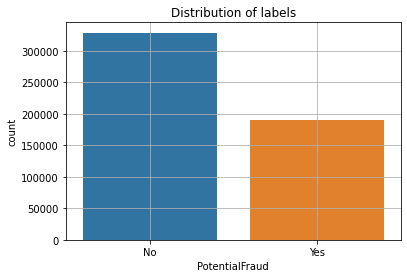

In [ ]:
# Cecking Distribution for Outpatient dataset
out=pd.merge(df_train,df_outpatient,
            on="Provider",
            how="outer")
sns.countplot(out["PotentialFraud"])
plt.title("Distribution of labels")
plt.grid("whitegrid")

print("Percentage of No(No fraud) Labels present is ",(out["PotentialFraud"].value_counts()[0]*100)/out["PotentialFraud"].count(),"%")
print("Percentage of Yes(Fraud) Labels present is ",(out["PotentialFraud"].value_counts()[1]*100)/out["PotentialFraud"].count(),"%")

**Observation**
1. In Outpatient file there are 328697 non fraud, 189438 fraud claim
2. Percentage of No class is 63.43%, Yes class is 36.56%



Percentage of No(No fraud) Labels present is  53.58969674826452 %
Percentage of Yes(Fraud) Labels present is  46.41030325173548 %


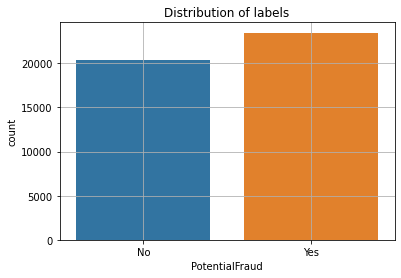

In [ ]:
# Cecking Distribution for INpatient dataset
In=pd.merge(df_train,df_inpatient,
            on="Provider",
            how="outer")
sns.countplot(In["PotentialFraud"])
plt.title("Distribution of labels")
plt.grid("whitegrid")

print("Percentage of No(No fraud) Labels present is ",(In["PotentialFraud"].value_counts()[0]*100)/In["PotentialFraud"].count(),"%")
print("Percentage of Yes(Fraud) Labels present is ",(In["PotentialFraud"].value_counts()[1]*100)/In["PotentialFraud"].count(),"%")

**Observation**
1. In train outpatient file there are 20324 non fraud, 23468 fraud claim
2. percentage of No class is 53.58%, Yes class is 46.56%



**CONCLUSION**

1.Maximum Frauds Happens when the Patient Gets admitted to Hospital,This because the patient can claim more amount



**<font color='Green'>1.2 Feature Provider vs Fraud</font>** 

The number of Providers present are : 5410
Top 5 Providers are  PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3436
Name: Provider, dtype: int64


Text(0.5, 1.0, 'Provider vs Fraud')

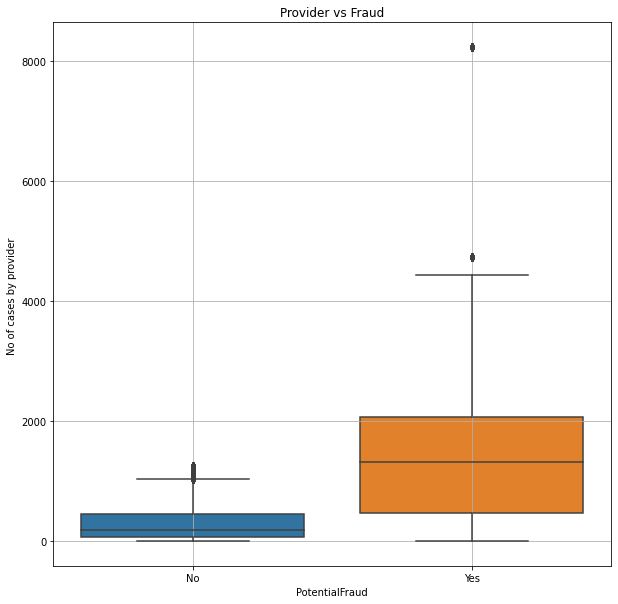

In [ ]:
# checking for the  Whole Data set
print("The number of Providers present are :",df["Provider"].value_counts().count())
print("Top 5 Providers are ",df["Provider"].value_counts()[:5])

provider_dict= df["Provider"].value_counts().to_dict()
count=df["Provider"].map(provider_dict)

plt.figure(figsize=(10,10))
sns.boxplot(data=df,y=count,x="PotentialFraud")
plt.grid("whitegrid")
plt.ylabel("No of cases by provider ")
plt.title("Provider vs Fraud")

In [ ]:
# checking for fraud/non fraud cases handled by each provider
# calculating number of fraud and non fraud cases from the each provider
def check(df,provider ):
  yes=0
  no=0
  g=df.groupby("Provider")
  data=g.get_group(provider)
  if data["PotentialFraud"].value_counts().keys()[0]=="Yes":
    yes=data["PotentialFraud"].value_counts()[0]
  if data["PotentialFraud"].value_counts().keys()[0]=="No":
    no=data["PotentialFraud"].value_counts()[0]
  return yes,no

print("Top 1 provider has Classes(yes,no) :",check(df,df["Provider"].value_counts().keys()[0]))
print("Top 2 provider has Classes(yes,no) :",check(df,df["Provider"].value_counts().keys()[1]))
print("Top 3 provider has Classes(yes,no) :",check(df,df["Provider"].value_counts().keys()[2]))
print("Top 93 provider has Classes(yes,no) :",check(df,df["Provider"].value_counts().keys()[93]))
print("Top 100 provider has Classes(yes,no) :",check(df,df["Provider"].value_counts().keys()[100]))

Top 1 provider has Classes(yes,no) : (8240, 0)
Top 2 provider has Classes(yes,no) : (4739, 0)
Top 3 provider has Classes(yes,no) : (4444, 0)
Top 93 provider has Classes(yes,no) : (0, 861)
Top 100 provider has Classes(yes,no) : (0, 828)


**Observation**
1. This analysis shows that the provider handling more number of cases tends to commit  fraud whereas the provider handling less cases do not commit any fraud
2. The Top Provider handles 8240 cases and least amount of cases handled by Provider are 1
3.also from the box plot if the Provider is handling more than 1800-2000  cases he/she may be involved in commiting Fraud




**************************************************
The number of Providers present are : 5410
Top 5 Providers are  PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3433
Name: Provider, dtype: int64
**************************************************





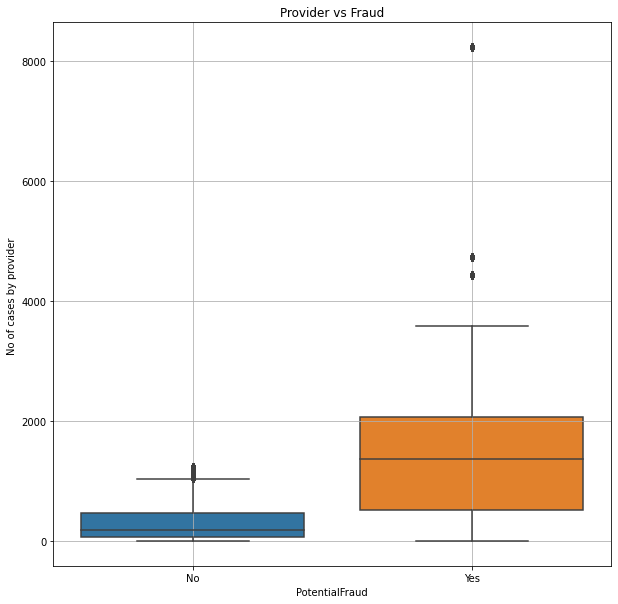




**************************************************
Top 1 provider has Classes(yes,no) : (8240, 0)
Top 2 provider has Classes(yes,no) : (4739, 0)
Top 3 provider has Classes(yes,no) : (4444, 0)
Top 93 provider has Classes(yes,no) : (842, 0)
Top 100 provider has Classes(yes,no) : (0, 818)


In [ ]:
# OUTPATIENT DATA
print("*"*50)
print("The number of Providers present are :",out["Provider"].value_counts().count())
print("Top 5 Providers are ",out["Provider"].value_counts()[:5])
print("*"*50)
print("\n\n")

#**************************************************************************************************************
provider_dict= out["Provider"].value_counts().to_dict()
count=out["Provider"].map(provider_dict)

plt.figure(figsize=(10,10))
sns.boxplot(data=out,y=count,x="PotentialFraud")
plt.grid("whitegrid")
plt.ylabel("No of cases by provider ")
plt.title("Provider vs Fraud")
plt.show()


#**************************************************************************************************************
print("\n\n")
print("*"*50)
print("Top 1 provider has Classes(yes,no) :",check(out,out["Provider"].value_counts().keys()[0]))
print("Top 2 provider has Classes(yes,no) :",check(out,out["Provider"].value_counts().keys()[1]))
print("Top 3 provider has Classes(yes,no) :",check(out,out["Provider"].value_counts().keys()[2]))
print("Top 93 provider has Classes(yes,no) :",check(out,out["Provider"].value_counts().keys()[93]))
print("Top 100 provider has Classes(yes,no) :",check(out,out["Provider"].value_counts().keys()[100]))

**Observation**
1. This analysis shows that the provider handling more number of cases tends to commit  fraud whereas the provider handling less cases do not commit any fraud
2. The Top Provider handles 8240 cases and least amount of cases handled by Provider are 1
3.also from the box plot if the Provider is handling more than 1800-2000 outpatient cases he/she may be involved in commiting Fraud


**************************************************
The number of Providers present are : 5410
Top 5 Providers are  PRV52019    516
PRV55462    386
PRV54367    322
PRV53706    282
PRV55209    275
Name: Provider, dtype: int64
**************************************************





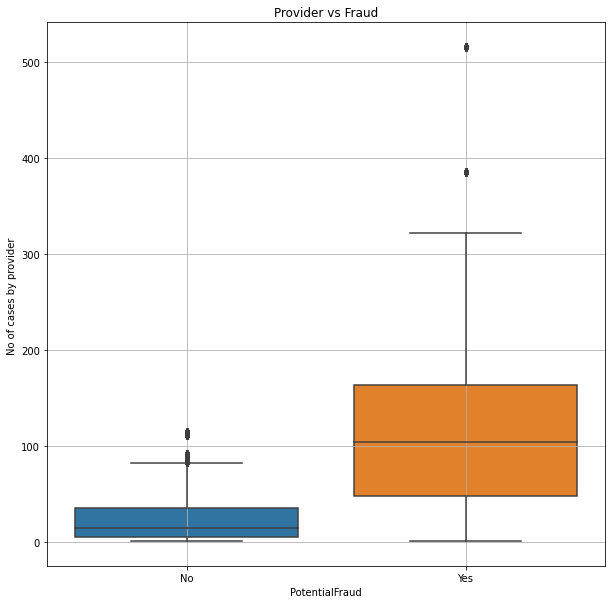




**************************************************
Top 1 provider has Classes(yes,no) : (516, 0)
Top 2 provider has Classes(yes,no) : (386, 0)
Top 3 provider has Classes(yes,no) : (322, 0)
Top 93 provider has Classes(yes,no) : (0, 86)
Top 100 provider has Classes(yes,no) : (0, 82)


In [ ]:
# INPPATIENT DATA

print("*"*50)
print("The number of Providers present are :",In["Provider"].value_counts().count())
print("Top 5 Providers are ",In["Provider"].value_counts()[:5])
print("*"*50)
print("\n\n")

#**************************************************************************************************************
provider_dict= In["Provider"].value_counts().to_dict()
count=In["Provider"].map(provider_dict)
plt.figure(figsize=(10,10))
sns.boxplot(data=In,y=count,x="PotentialFraud")
plt.grid("whitegrid")
plt.ylabel("No of cases by provider ")
plt.title("Provider vs Fraud")
plt.show()

#**************************************************************************************************************
print("\n\n")
print("*"*50)
print("Top 1 provider has Classes(yes,no) :",check(In,In["Provider"].value_counts().keys()[0]))
print("Top 2 provider has Classes(yes,no) :",check(In,In["Provider"].value_counts().keys()[1]))
print("Top 3 provider has Classes(yes,no) :",check(In,In["Provider"].value_counts().keys()[2]))
print("Top 93 provider has Classes(yes,no) :",check(In,In["Provider"].value_counts().keys()[93]))
print("Top 100 provider has Classes(yes,no) :",check(In,In["Provider"].value_counts().keys()[100]))

**Observation**
1. This analysis shows that the provider handling more number of cases tends to commit  fraud whereas the provider handling less cases do not commit any fraud
2. The Top Provider handles 516 cases and least amount of cases handled by Provider are 1
3. also from the box plot if the Provider is handling more than 120-150 Inpatient cases he/she may be involved in commiting Fraud

**<font color='Green'>1.3 BeneID vs Fraud</font>** 

**************************************************
The number of patients are : 138556
The Top 5 Patients with maximum number of claims are :
 BENE42721     29
BENE59303     29
BENE118316    29
BENE44241     28
BENE80977     28
Name: BeneID, dtype: int64
**************************************************





Text(0.5, 1.0, 'No of Claims filed VS Fraud')

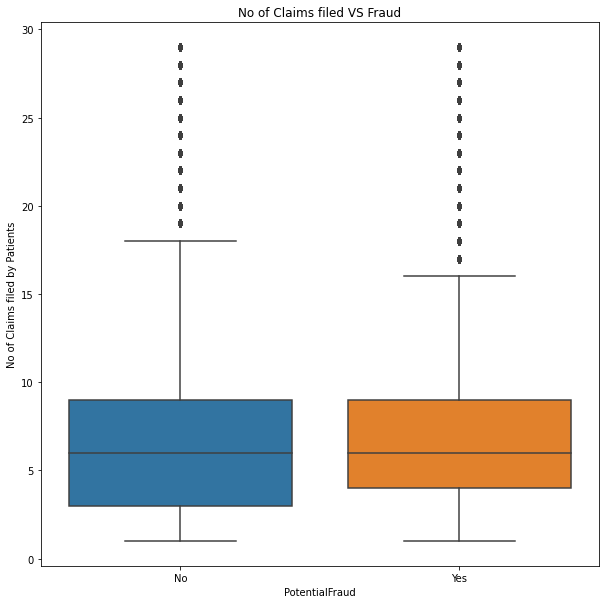

In [ ]:
# WHOLE DATASET 
print("*"*50)
print("The number of patients are :",df["BeneID"].value_counts().count())
print("The Top 5 Patients with maximum number of claims are :\n",df["BeneID"].value_counts()[:5])
print("*"*50)
print("\n\n")
plt.figure(figsize=(10,10))
bene=df["BeneID"].value_counts().to_dict()
count=df["BeneID"].map(bene)
sns.boxplot(data=df,y=count,x="PotentialFraud")
plt.ylabel("No of Claims filed by Patients")
plt.title("No of Claims filed VS Fraud")

**Observation**
1. The total Number Of patients are 138556
2. The Maximum claims filed by a patient is 29 and minimum is 1


**************************************************
The number of patients are : 133980
The Top 5 Patients with maximum number of claims are :
 BENE42721     29
BENE118316    29
BENE59303     27
BENE63544     27
BENE143400    27
Name: BeneID, dtype: int64
**************************************************





Text(0.5, 1.0, 'No of Claims filed VS Fraud')

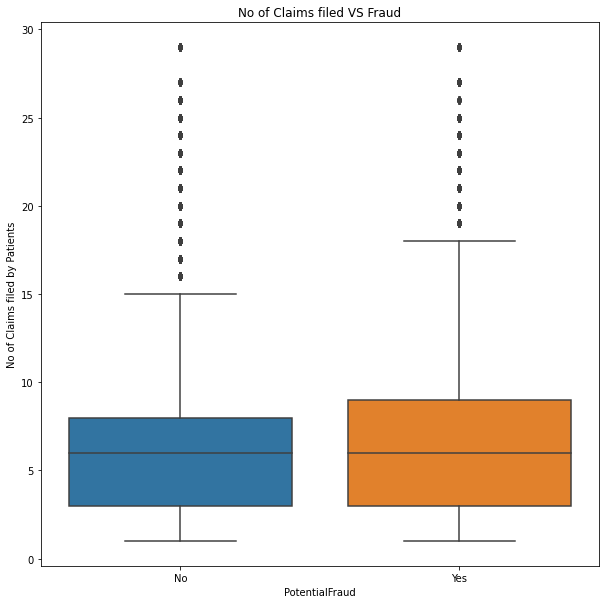

In [ ]:
# OUTPATIENT DATASET 
print("*"*50)
print("The number of patients are :",out["BeneID"].value_counts().count())
print("The Top 5 Patients with maximum number of claims are :\n",out["BeneID"].value_counts()[:5])
print("*"*50)
print("\n\n")
plt.figure(figsize=(10,10))
bene=out["BeneID"].value_counts().to_dict()
count=out["BeneID"].map(bene)
sns.boxplot(data=out,y=count,x="PotentialFraud")
plt.ylabel("No of Claims filed by Patients")
plt.title("No of Claims filed VS Fraud")

**Observation**
1. The total Number Of patients are 133980
2. The Maximum claims filed by a patient is 29 and minimum is 1


**************************************************
The number of patients are : 31289
The Top 5 Patients with maximum number of claims are :
 BENE134170    8
BENE119457    7
BENE121796    7
BENE64791     7
BENE62091     7
Name: BeneID, dtype: int64
**************************************************





Text(0.5, 1.0, 'No of Claims filed VS Fraud')

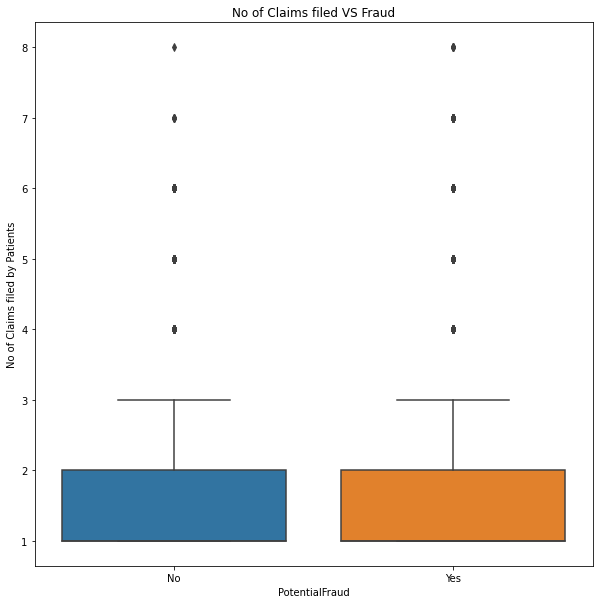

In [ ]:
# INPATIENT DATASET 
print("*"*50)
print("The number of patients are :",In["BeneID"].value_counts().count())
print("The Top 5 Patients with maximum number of claims are :\n",In["BeneID"].value_counts()[:5])
print("*"*50)
print("\n\n")
plt.figure(figsize=(10,10))
bene=In["BeneID"].value_counts().to_dict()
count=In["BeneID"].map(bene)
sns.boxplot(data=In,y=count,x="PotentialFraud")
plt.ylabel("No of Claims filed by Patients")
plt.title("No of Claims filed VS Fraud")

**Observation**
1. The total Number Of patients are 31289
2. The Maximum claims filed by a patient is 8 and minimum is 1


**<font color='Green'>1.4 Race vs Fraud</font>** 

**************************************************
The Number Of Race Categoreis Present are: 4
The Categories and their claim counts are:
 1    471036
2     55640
3     19715
5     11820
Name: Race, dtype: int64


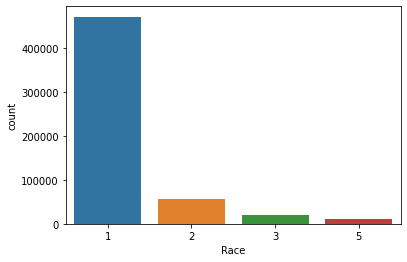

**************************************************





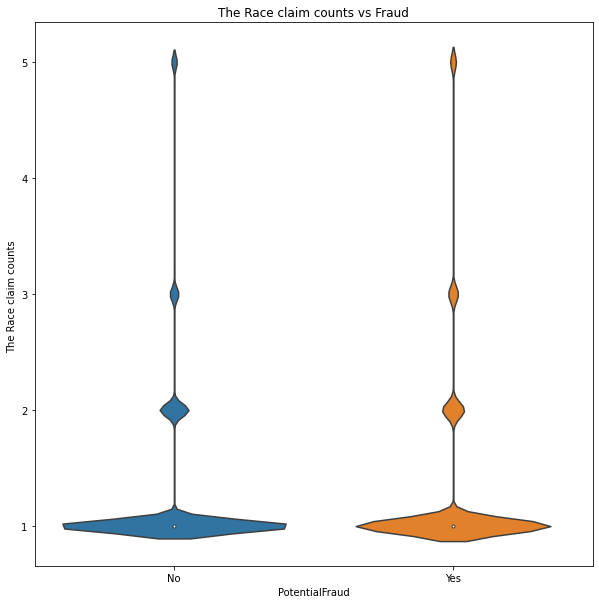

In [ ]:
# Whole Data
print("*"*50)
print("The Number Of Race Categoreis Present are:",df["Race"].value_counts().count())
print("The Categories and their claim counts are:\n",df["Race"].value_counts())
sns.countplot(x=df["Race"])
plt.show()
print("*"*50)
print("\n\n")
plt.figure(figsize=(10,10))
sns.violinplot(x="PotentialFraud",y="Race",data=df)
plt.title("The Race claim counts vs Fraud")
plt.ylabel("The Race claim counts ")
plt.show()

**Observation**
1. The total Number Of Race Categories are 4
2. The People belonging to category 1 have filed maximum claims
3. From the Violin plot The Category 1 people are more involved in commiting fraud than other categories 


**<font color='Green'>1.5 State vs Fraud</font>** 

**************************************************
The Number Of States are : 52
Top 5 States With Maximum Claims are :
 5     51350
10    39073
33    35024
45    34022
14    24417
Name: State, dtype: int64
**************************************************





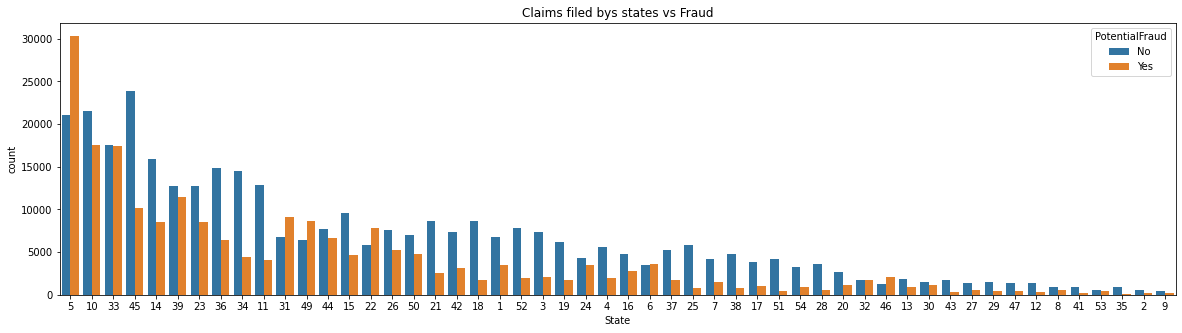

In [ ]:
print("*"*50)
print("The Number Of States are :",df["State"].value_counts().count())
print("Top 5 States With Maximum Claims are :\n",df["State"].value_counts()[:5])
print("*"*50)
print("\n\n")
plt.figure(figsize=(20,5))
sns.countplot(x=df["State"],hue=df["PotentialFraud"],order=df["State"].value_counts().keys())
plt.title("Claims filed bys states vs Fraud")
plt.show()

**Observation**
1. The total Number Of States are 52
2. The State which filed maximum claims is state 5 with 51350 Claims
3. The State which filed maximum claims is state 9 with 617 Claims



**<font color='Green'>1.6 InscClaimAmtReimbursed vs Fraud</font>**

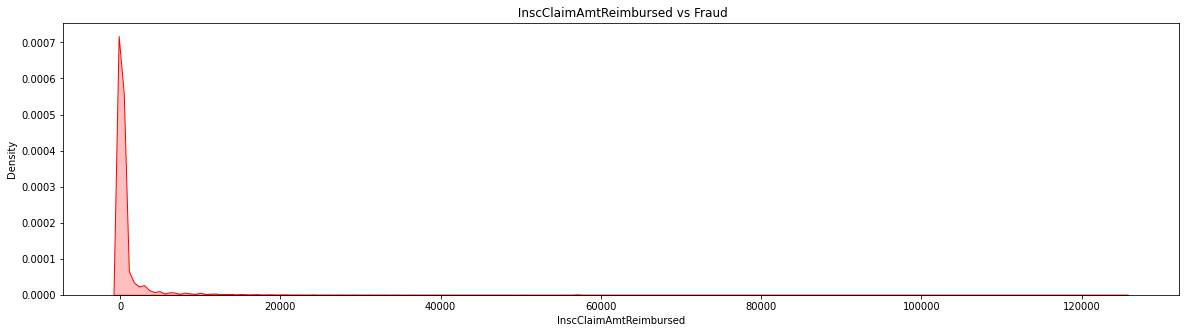




The 25 Percentile values is  40.0
The 50 Percentile values is  80.0
The 75 Percentile values is  300.0
The 90 Percentile values is  2000.0
The 99 Percentile values is  17000.0
The 99.1 Percentile values is 18000.0
The 99.2 Percentile values is 19000.0
The 99.3 Percentile values is 21000.0
The 99.4 Percentile values is 23000.0
The 99.5 Percentile values is 25000.0
The 99.6 Percentile values is 29000.0
The 99.7 Percentile values is 33000.0
The 99.8 Percentile values is 39000.0
The 99.9 Percentile values is 55000.0
The 100 Percentile values is  125000.0


In [ ]:
# Whole Dataset
plt.figure(figsize=(20,5))
sns.kdeplot(df["InscClaimAmtReimbursed"],shade=True,color="R")
plt.title(" InscClaimAmtReimbursed vs Fraud")
plt.show()

print("\n\n")
print("The 25 Percentile values is ",np.percentile(df["InscClaimAmtReimbursed"],25))  
print("The 50 Percentile values is ",np.percentile(df["InscClaimAmtReimbursed"],50))  
print("The 75 Percentile values is ",np.percentile(df["InscClaimAmtReimbursed"],75))  
print("The 90 Percentile values is ",np.percentile(df["InscClaimAmtReimbursed"],90)) 
print("The 99 Percentile values is ",np.percentile(df["InscClaimAmtReimbursed"],99)) 
for i in range(1,10):
  a=99
  b=i/10
  a=a+b
  print(f"The {a} Percentile values is {np.percentile(df['InscClaimAmtReimbursed'],a)}")
print("The 100 Percentile values is ",np.percentile(df["InscClaimAmtReimbursed"],100))

**Observation**
1. The Maximum amount Reimbursed is 125000
2. The 90% of claims has reimbursed amount to be less than  2000
3. There is Huge difference between 99 and 100 percentile may be it is fraud claim



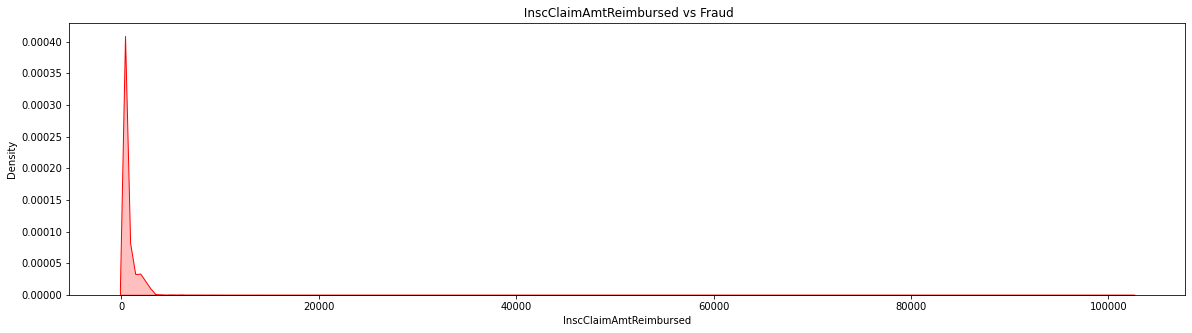




The 25 Percentile values is  40.0
The 50 Percentile values is  80.0
The 75 Percentile values is  200.0
The 90 Percentile values is  700.0
The 99 Percentile values is  3300.0
The 99.1 Percentile values is 3300.0
The 99.2 Percentile values is 3300.0
The 99.3 Percentile values is 3300.0
The 99.4 Percentile values is 3300.0
The 99.5 Percentile values is 3300.0
The 99.6 Percentile values is 3300.0
The 99.7 Percentile values is 3300.0
The 99.8 Percentile values is 3300.0
The 99.9 Percentile values is 3500.0
The 100 Percentile values is  102500.0


In [ ]:
# OutPatient Dataset
plt.figure(figsize=(20,5))
sns.kdeplot(out["InscClaimAmtReimbursed"],shade=True,color="R")
plt.title(" InscClaimAmtReimbursed vs Fraud")
plt.show()

print("\n\n")
print("The 25 Percentile values is ",np.percentile(out["InscClaimAmtReimbursed"].dropna(),25))  
print("The 50 Percentile values is ",np.percentile(out["InscClaimAmtReimbursed"].dropna(),50))  
print("The 75 Percentile values is ",np.percentile(out["InscClaimAmtReimbursed"].dropna(),75))  
print("The 90 Percentile values is ",np.percentile(out["InscClaimAmtReimbursed"].dropna(),90)) 
print("The 99 Percentile values is ",np.percentile(out["InscClaimAmtReimbursed"].dropna(),99)) 
for i in range(1,10):
  a=99
  b=i/10
  a=a+b
  print(f"The {a} Percentile values is {np.percentile(out['InscClaimAmtReimbursed'].dropna(),a)}")
print("The 100 Percentile values is ",np.percentile(out["InscClaimAmtReimbursed"].dropna(),100))

**Observation**
1. The Maximum amount Reimbursed is 102500
2. The 90% of claims has reimbursed amount to be less than  700
3. There is Huge difference between 99 and 100 percentile may be it is fraud claim



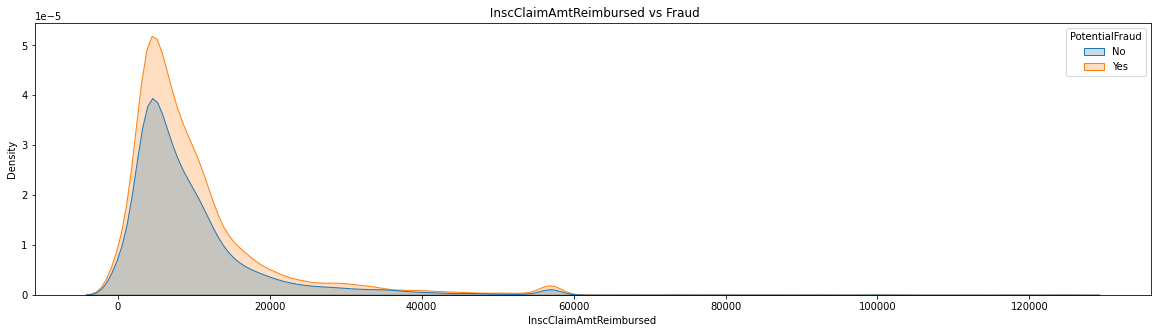




The 25 Percentile values is  4000.0
The 50 Percentile values is  7000.0
The 75 Percentile values is  12000.0
The 90 Percentile values is  20000.0
The 99 Percentile values is  57000.0
The 99.1 Percentile values is 57000.0
The 99.2 Percentile values is 57000.0
The 99.3 Percentile values is 57000.0
The 99.4 Percentile values is 57000.0
The 99.5 Percentile values is 57000.0
The 99.6 Percentile values is 57000.0
The 99.7 Percentile values is 57000.0
The 99.8 Percentile values is 72053.99999999645
The 99.9 Percentile values is 90000.0
The 100 Percentile values is  125000.0


In [ ]:
# INPatient Dataset
plt.figure(figsize=(20,5))
sns.kdeplot(In["InscClaimAmtReimbursed"],hue=In["PotentialFraud"],shade=True,color="R")
plt.title(" InscClaimAmtReimbursed vs Fraud")
plt.show()

print("\n\n")
print("The 25 Percentile values is ",np.percentile(In["InscClaimAmtReimbursed"].dropna(),25))  
print("The 50 Percentile values is ",np.percentile(In["InscClaimAmtReimbursed"].dropna(),50))  
print("The 75 Percentile values is ",np.percentile(In["InscClaimAmtReimbursed"].dropna(),75))  
print("The 90 Percentile values is ",np.percentile(In["InscClaimAmtReimbursed"].dropna(),90)) 
print("The 99 Percentile values is ",np.percentile(In["InscClaimAmtReimbursed"].dropna(),99)) 
for i in range(1,10):
  a=99
  b=i/10
  a=a+b
  print(f"The {a} Percentile values is {np.percentile(In['InscClaimAmtReimbursed'].dropna(),a)}")
print("The 100 Percentile values is ",np.percentile(In["InscClaimAmtReimbursed"].dropna(),100))

**Observation**
1. The Maximum amount Reimbursed is 125000
2. The 90% of claims has reimbursed amount to be less than 20000.0



**<font color='Green'>1.7 IPAnnualReimbursementAmt vs Fraud</font>**

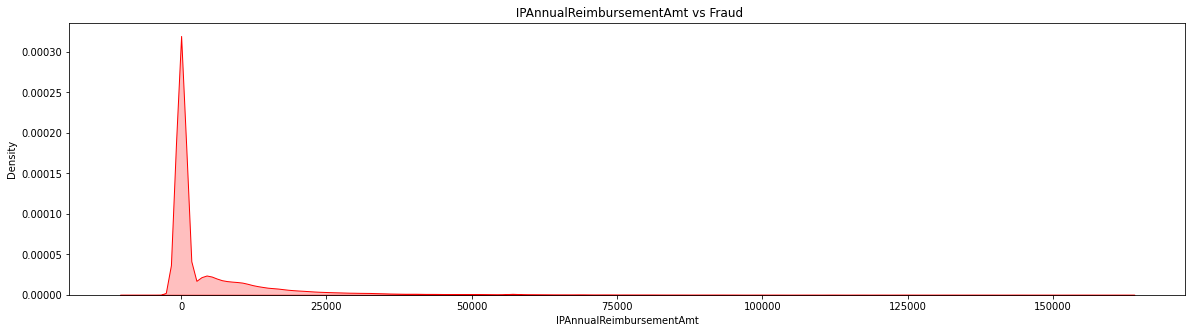




The 25 Percentile values is  0.0
The 50 Percentile values is  0.0
The 75 Percentile values is  6000.0
The 90 Percentile values is  17000.0
The 99 Percentile values is  57200.0
The 99.1 Percentile values is 58610.0
The 99.2 Percentile values is 60620.0
The 99.3 Percentile values is 63000.0
The 99.4 Percentile values is 66000.0
The 99.5 Percentile values is 69020.0
The 99.6 Percentile values is 73210.0
The 99.7 Percentile values is 79000.0
The 99.8 Percentile values is 86894.99999998952
The 99.9 Percentile values is 103000.0
The 100 Percentile values is  161470.0





Text(0.5, 1.0, 'IPAnnualReimbursementAmt vs Fraud')

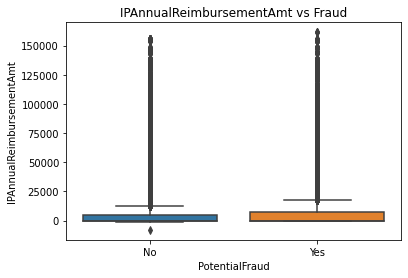

In [ ]:
# Whole Dataset
plt.figure(figsize=(20,5))
sns.kdeplot(df["IPAnnualReimbursementAmt"],shade=True,color="R")
plt.title(" IPAnnualReimbursementAmt vs Fraud")
plt.show()

print("\n\n")
print("The 25 Percentile values is ",np.percentile(df["IPAnnualReimbursementAmt"],25))  
print("The 50 Percentile values is ",np.percentile(df["IPAnnualReimbursementAmt"],50))  
print("The 75 Percentile values is ",np.percentile(df["IPAnnualReimbursementAmt"],75))  
print("The 90 Percentile values is ",np.percentile(df["IPAnnualReimbursementAmt"],90)) 
print("The 99 Percentile values is ",np.percentile(df["IPAnnualReimbursementAmt"],99)) 
for i in range(1,10):
  a=99
  b=i/10
  a=a+b
  print(f"The {a} Percentile values is {np.percentile(df['IPAnnualReimbursementAmt'],a)}")
print("The 100 Percentile values is ",np.percentile(df["IPAnnualReimbursementAmt"],100))
print("\n\n")

sns.boxplot(y='IPAnnualReimbursementAmt',x="PotentialFraud",data=df)
plt.title("IPAnnualReimbursementAmt vs Fraud")

**Observation**
1. The Maximum amount Reimbursed for Inpatient is 161470
2. The 90% of claims has reimbursed amount to be less than 17000.0
3. From Box plot both the categories No and Yes are have same range for amount to reimbursed but for fraud case the highest amount to claim. 



**<font color='Green'>1.8 OPAnnualReimbursementAmt vs Fraud</font>**

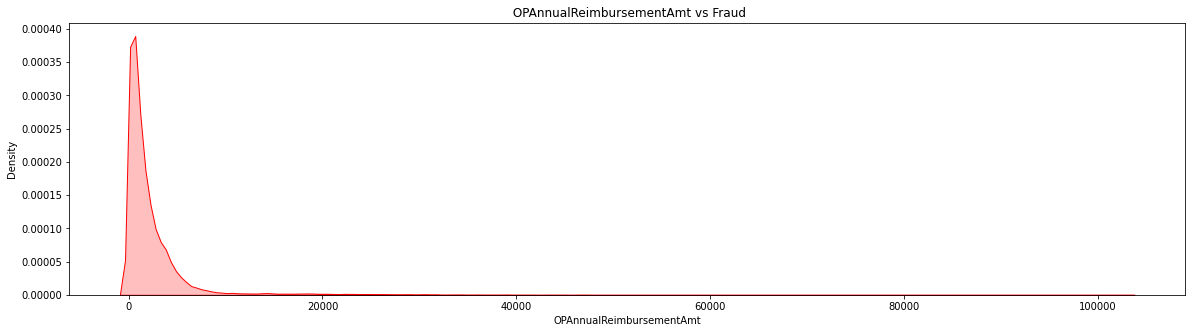




The 25 Percentile values is  460.0
The 50 Percentile values is  1170.0
The 75 Percentile values is  2590.0
The 90 Percentile values is  4700.0
The 99 Percentile values is  22080.0
The 99.1 Percentile values is 22740.0
The 99.2 Percentile values is 23530.0
The 99.3 Percentile values is 24580.0
The 99.4 Percentile values is 25560.0
The 99.5 Percentile values is 26900.0
The 99.6 Percentile values is 28560.0
The 99.7 Percentile values is 30200.0
The 99.8 Percentile values is 32240.0
The 99.9 Percentile values is 36340.0
The 100 Percentile values is  102960.0





Text(0.5, 1.0, 'OPAnnualReimbursementAmt vs Fraud')

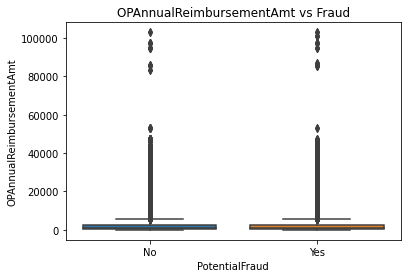

In [ ]:
# Whole Dataset
plt.figure(figsize=(20,5))
sns.kdeplot(df["OPAnnualReimbursementAmt"],shade=True,color="R")
plt.title(" OPAnnualReimbursementAmt vs Fraud")
plt.show()

print("\n\n")
print("The 25 Percentile values is ",np.percentile(df["OPAnnualReimbursementAmt"],25))  
print("The 50 Percentile values is ",np.percentile(df["OPAnnualReimbursementAmt"],50))  
print("The 75 Percentile values is ",np.percentile(df["OPAnnualReimbursementAmt"],75))  
print("The 90 Percentile values is ",np.percentile(df["OPAnnualReimbursementAmt"],90)) 
print("The 99 Percentile values is ",np.percentile(df["OPAnnualReimbursementAmt"],99)) 
for i in range(1,10):
  a=99
  b=i/10
  a=a+b
  print(f"The {a} Percentile values is {np.percentile(df['OPAnnualReimbursementAmt'],a)}")
print("The 100 Percentile values is ",np.percentile(df["OPAnnualReimbursementAmt"],100))
print("\n\n")

sns.boxplot(y='OPAnnualReimbursementAmt',x="PotentialFraud",data=df)
plt.title("OPAnnualReimbursementAmt vs Fraud")

**Observation**
1. The Maximum amount Reimbursed for Inpatient is 102960.0
2. The 90% of claims has reimbursed amount to be less than 4700
3. From Box plot both the categories No and Yes are have same range for amount to reimbursed .



**<font color='Green'>1.9 AttendingPhysician vs Fraud</font>**

The number of AttendingPhysician present are : 82063
Top 5 AttendingPhysician are  PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
Name: AttendingPhysician, dtype: int64


Text(0.5, 1.0, 'AttendingPhysician vs Fraud')

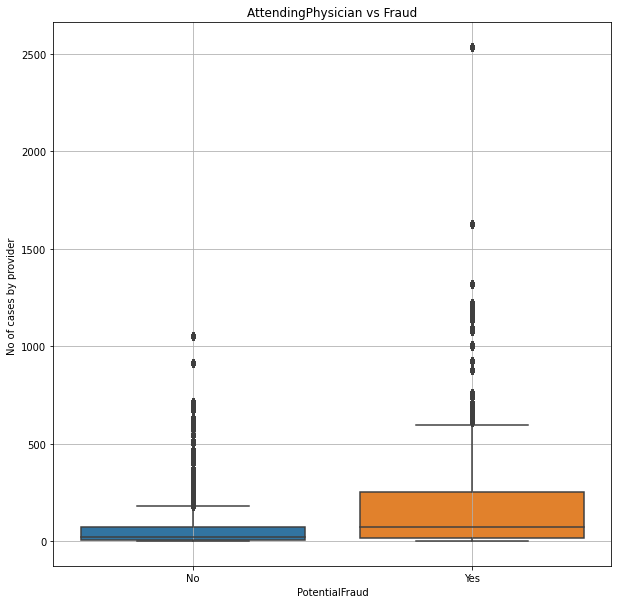

In [ ]:
# Whole Data set
print("The number of AttendingPhysician present are :",df["AttendingPhysician"].value_counts().count())
print("Top 5 AttendingPhysician are ",df["AttendingPhysician"].value_counts()[:5])

provider_dict= df["AttendingPhysician"].value_counts().to_dict()
count=df["AttendingPhysician"].map(provider_dict)

plt.figure(figsize=(10,10))
sns.boxplot(data=df,y=count,x="PotentialFraud")
plt.grid("whitegrid")
plt.ylabel("No of cases by provider ")
plt.title("AttendingPhysician vs Fraud")


**Observation**
1. The Total Number Of attending Physican are 82063
2. From The box plot if the Physician attending more cases then may be he is invloved in commiting fraud and if it is handling less number of cases make non fraud.
3. The maximum number of handled cases are 2534



The number of AttendingPhysician present are : 74109
Top 5 AttendingPhysician are  PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
Name: AttendingPhysician, dtype: int64


Text(0.5, 1.0, 'AttendingPhysician vs Fraud')

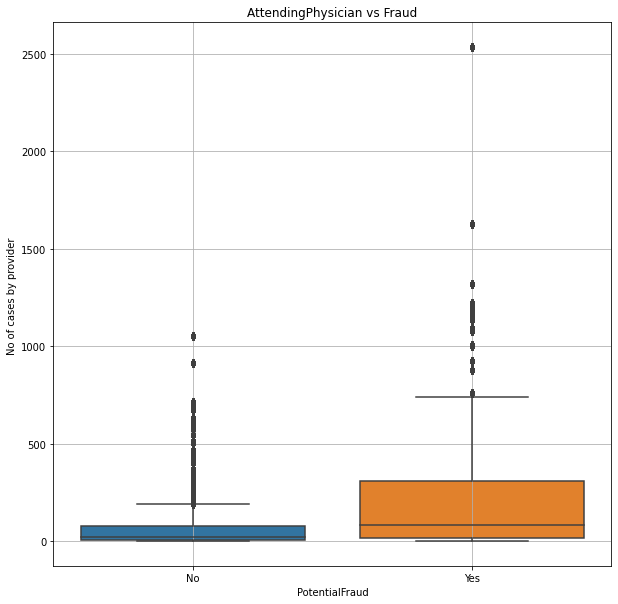

In [ ]:
# Outpatient Data set
print("The number of AttendingPhysician present are :",out["AttendingPhysician"].value_counts().count())
print("Top 5 AttendingPhysician are ",out["AttendingPhysician"].value_counts()[:5])

provider_dict= out["AttendingPhysician"].value_counts().to_dict()
count=out["AttendingPhysician"].map(provider_dict)

plt.figure(figsize=(10,10))
sns.boxplot(data=out,y=count,x="PotentialFraud")
plt.grid("whitegrid")
plt.ylabel("No of cases by provider ")
plt.title("AttendingPhysician vs Fraud")


**Observation**
1. The Total Number Of attending Physican are 74109
2. From The box plot if the Physician attending more cases then may be he is invloved in commiting fraud and if it is handling less number of cases make non fraud.
3. The maximum number of handled cases are 2534



The number of AttendingPhysician present are : 11604
Top 5 AttendingPhysician are  PHY422134    386
PHY341560    274
PHY315112    208
PHY411541    198
PHY362864    195
Name: AttendingPhysician, dtype: int64


Text(0.5, 1.0, 'AttendingPhysician vs Fraud')

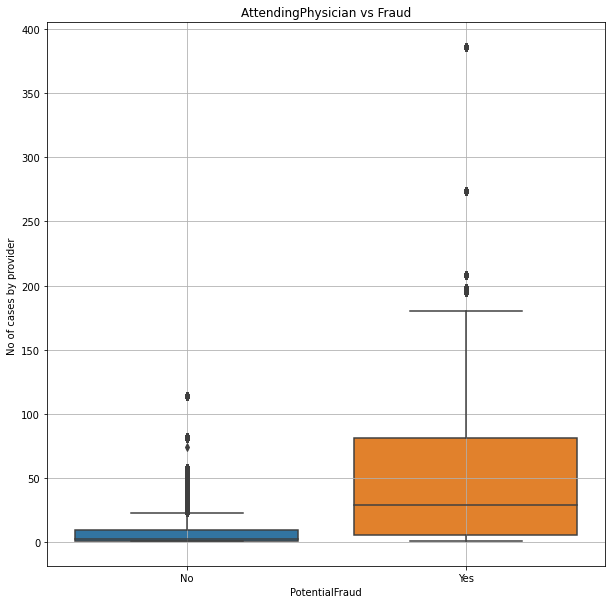

In [ ]:
# Inpatient Data set
print("The number of AttendingPhysician present are :",In["AttendingPhysician"].value_counts().count())
print("Top 5 AttendingPhysician are ",In["AttendingPhysician"].value_counts()[:5])

provider_dict= In["AttendingPhysician"].value_counts().to_dict()
count=In["AttendingPhysician"].map(provider_dict)

plt.figure(figsize=(10,10))
sns.boxplot(data=In,y=count,x="PotentialFraud")
plt.grid("whitegrid")
plt.ylabel("No of cases by provider ")
plt.title("AttendingPhysician vs Fraud")


**Observation**
1. The Total Number Of attending Physican are 11604
2. From The box plot if the Physician attending more cases then may be he is invloved in commiting fraud and if it is handling less number of cases make non fraud.
3. The maximum number of handled cases are 386



**<font color='Green'>1.10 DiagnoiseCode vs Fraud</font>**

The Null values Present are 3901394
The Shape   after droping nullvalues Present are 1680716
The number of categories of code present are:  11014


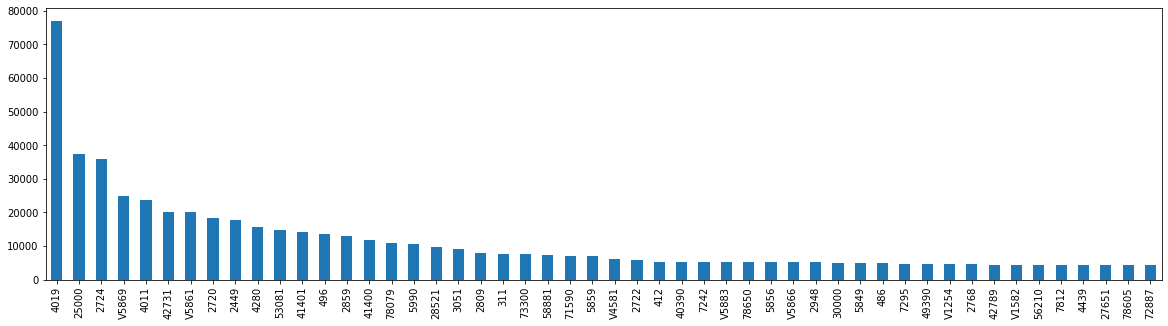




The number of categories of code present are:  4019     77056
25000    37356
2724     35763
V5869    24904
4011     23773
42731    20138
V5861    20001
2720     18268
2449     17600
4280     15507
Name: DiagnosisCode, dtype: int64


In [ ]:
#Concating all the DiagnosisCode
data = pd.DataFrame(columns = ['DiagnosisCode'])
data['DiagnosisCode'] = pd.concat([df["ClmDiagnosisCode_1"],df["ClmDiagnosisCode_2"],df["ClmDiagnosisCode_3"],df["ClmDiagnosisCode_4"],df["ClmDiagnosisCode_5"],
                          df["ClmDiagnosisCode_6"],df["ClmDiagnosisCode_7"],df["ClmDiagnosisCode_8"],df["ClmDiagnosisCode_9"],
                          df["ClmDiagnosisCode_10"]], axis=0)
print("The Null values Present are",  data["DiagnosisCode"].isnull().sum())
data.dropna(inplace=True)
print("The Shape   after droping nullvalues Present are",  data["DiagnosisCode"].shape[0])

print("The number of categories of code present are: ",data["DiagnosisCode"].value_counts().count())
codes=data["DiagnosisCode"].value_counts()[:50]
plt.figure(figsize=(20,5))
codes.plot(kind="bar")
plt.show()
print("\n\n")
print("The number of categories of code present are: ",data["DiagnosisCode"].value_counts()[:10])


**Observation**
1. The Number of Unique Code are 11014
2. The most common codes used is 4019 with count of 77056


**<font color='Green'>1.10 Bivariate Analysis of Provider and AttendingPhysican </font>**

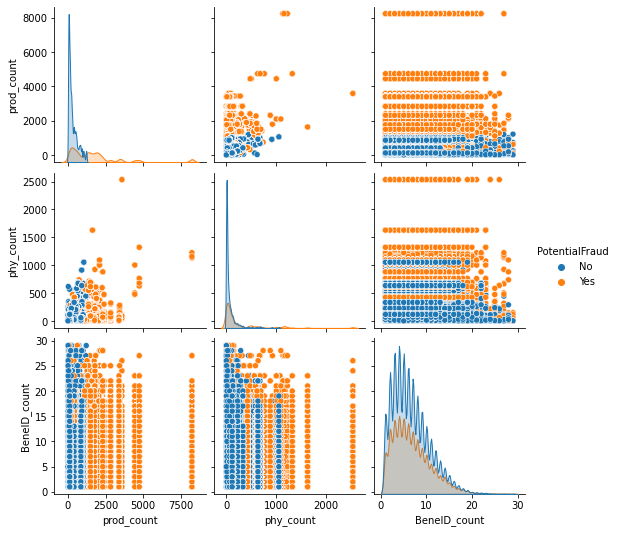

In [ ]:
phy_dict= df["AttendingPhysician"].value_counts().to_dict()
df["phy_count"]=df["AttendingPhysician"].map(phy_dict)

prod_dict= df["Provider"].value_counts().to_dict()
df["prod_count"]=df["Provider"].map(prod_dict)

bene_dict= df["BeneID"].value_counts().to_dict()
df["BeneID_count"]=df["BeneID"].map(bene_dict)

sns.pairplot(data=df,hue='PotentialFraud',vars=["prod_count","phy_count","BeneID_count"])

In [ ]:
print("The Top 5 Patients with maximum claims are \n",df["BeneID"].value_counts()[:5])
top_patients=df["BeneID"].value_counts().keys()[:50]
print("**"*50)
print("The Top 5 Provider with maximum claims are \n",df["Provider"].value_counts()[:5])
top_provider=df["Provider"].value_counts().keys()[:50]
print("**"*50)
print("The Top 5 AttendingPhysician with maximum claims are \n",df["AttendingPhysician"].value_counts()[:5])
top_physican=df["AttendingPhysician"].value_counts().keys()[:50]
print("**"*50)

pp1=[]
for i in range(5):
  g=df.groupby("Provider")
  data=g.get_group(top_provider[i])
  for j in range(5):
    if any(data[(data["AttendingPhysician"]==top_physican[j])&(data["PotentialFraud"]=="Yes")]):
      pp1.append(((top_provider[i],top_physican[j]),"Yes"))


pb1=[]
for i in range(5):
  g=df.groupby("BeneID")
  data=g.get_group(top_patients[i])
  for j in range(5):
    if any(data[(data["AttendingPhysician"]==top_physican[j])&(data["PotentialFraud"]=="Yes")]):
      pb1.append(((top_patients[i],top_physican[j]),"Yes"))
print("**"*50)
print("The top 10 Provider and Physcian that are involved in Commiting Fraud are:\n")
for i in pp1:
  print(i)
print("The top 10 Patients and Physcian that are involved in Commiting Fraud are:")
for i in pb1:
  print(i)

The Top 5 Patients with maximum claims are 
 BENE42721     29
BENE59303     29
BENE118316    29
BENE44241     28
BENE80977     28
Name: BeneID, dtype: int64
****************************************************************************************************
The Top 5 Provider with maximum claims are 
 PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3436
Name: Provider, dtype: int64
****************************************************************************************************
The Top 5 AttendingPhysician with maximum claims are 
 PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
Name: AttendingPhysician, dtype: int64
****************************************************************************************************
****************************************************************************************************
The top 10 Provider and Physcian that are involved in Commiting Fraud are:

(('PRV51459', 'PHY33

In [ ]:
df.drop(columns=["prod_count","phy_count","BeneID_count"],inplace=True,axis=1)

**Observation**
1. From the Analysis The top 5 Provider combinations with Physican are involved in fraud this conclude that all the Provider and Physican who handle more cases are involved in Fraud
2. From the Analysis The top 5 Patients combinations with Physican are involved in fraud this conclude that all the Patients and Physican who handle more cases are involved in Fraud

**<font color='Green'>1.10 Gender vs Fraud</font>**

Text(0.5, 1.0, 'Gender vs Fraud')

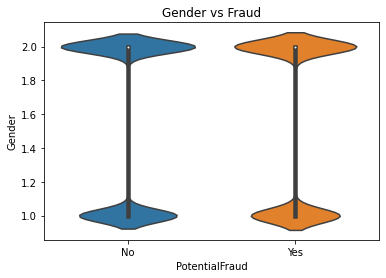

In [ ]:
sns.violinplot(y="Gender",x="PotentialFraud",data=df)
plt.title("Gender vs Fraud")


**Observation**
1. From the Plot the gender 2 are more involved in the Fraud 

##SUMMARY
1. The Distribution of Data Points are 61.87% of them are not Fraud Claims, 38.12% are Fraud claims
2.  If the  provider is  handling more number of cases tends to commit  fraud whereas the provider handling less cases do not commit any fraud.
3.  If The patient files more claims he/she is involved in Fraud.
4. The people belong Race Category 1 are involved in fraud most of the time
5. The states like 5,10,34 have more than 15000 fraud cases
6. for the 90% of claims the reimbursed amt is less(2000) and if the amout is too big may it falls under fraud claim
7. if the Physician attending more cases then may be he is invloved in commiting fraud and if it is handling less number of cases make non fraud.
8. If the most attended physician and most cases handled provider files claim together then they are involved in fraud
9. If the most attended physician and Top patient files claim together then they are involved in fraud
10. Rest of the columns are containg most of Null values and not interpreting any reult


#Data Preprocessing

In [ ]:
# The Potential Fraud has 2 cateories Yes/No coverting it to 1/0
df["PotentialFraud"]=np.where(df["PotentialFraud"]=="Yes",1,0)
df["PotentialFraud"].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [ ]:
# The Column RenalDiseaseIndicator has 2 categories Y/0 converting to 1/0
df["RenalDiseaseIndicator"]=np.where(df["RenalDiseaseIndicator"]=="Y",1,0) 
df["RenalDiseaseIndicator"].value_counts()

0    448363
1    109848
Name: RenalDiseaseIndicator, dtype: int64

In [ ]:
# Checking for the NULL Values
df.isnull().sum()

Provider                                0
PotentialFraud                          0
BeneID                                  0
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt          

In [ ]:
# The columns ClmProcedureCode_4 ,ClmProcedureCode_5 ,ClmProcedureCode_6  have all null values AND NoOfMonths_PartACov', 'NoOfMonths_PartBCov' have same values so droping them
df.drop(columns=["ClmProcedureCode_4","ClmProcedureCode_5","ClmProcedureCode_6","NoOfMonths_PartACov", "NoOfMonths_PartBCov"],inplace=True, axis=1 )

In [ ]:
#Replacing all the null values with 0
imp = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4',
             'ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8',
             'ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2'
             ,'ClmProcedureCode_3','DiagnosisGroupCode','ClmAdmitDiagnosisCode']
for i in imp:
  df[i]=df[i].replace({np.nan:0})

In [ ]:
df

,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3
0,PRV51001,0,BENE11727,1930-05-01,NaN,1,1,1,1,660,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,NaN,0,0.0,NaN,0,5953,42731,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,PRV51001,0,BENE24646,1943-03-01,NaN,1,1,0,1,440,1,2,2,2,2,2,1,1,1,2,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,NaN,0,0.0,NaN,0,78650,51889,V5869,4019,V4581,49320,0,0,0,0,0.0,0.0,0.0
2,PRV51001,0,BENE31617,1933-08-01,NaN,2,1,0,1,660,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,NaN,59970,0.0,NaN,0,V446,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
3,PRV51001,0,BENE32715,1936-03-01,NaN,1,1,0,1,410,1,1,1,1,1,1,1,1,2,2,2,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,NaN,78902,0.0,NaN,0,78964,V442,5589,2720,33829,25002,0,0,0,0,0.0,0.0,0.0
4,PRV51001,0,BENE36012,1940-07-01,NaN,1,1,0,1,510,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,2009-07-04,29623,1068.0,2009-07-08,882,29650,2971,3051,V1254,07070,28260,7823,49300,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PRV57763,0,BENE148535,1940-02-01,NaN,2,2,0,21,210,1,2,2,2,2,1,1,1,1,1,2,0,0,1780,320,CLM582682,2009-09-16,2009-09-25,1100,PHY321072,PHY321072,PHY321072,NaN,0,40.0,NaN,0,72740,78052,56942,71534,3540,0,0,0,0,0,0.0,0.0,0.0
558207,PRV57763,0,BENE150998,1958-12-01,NaN,1,2,0,21,210,2,2,2,2,2,2,2,2,2,2,2,0,0,200,200,CLM553988,2009-08-30,2009-08-30,200,PHY321072,NaN,NaN,NaN,0,0.0,NaN,0,V1251,72981,0,0,0,0,0,0,0,0,0.0,0.0,0.0
558208,PRV57763,0,BENE151006,1963-08-01,NaN,2,1,1,21,210,2,2,1,1,1,2,1,1,2,2,2,28150,2136,1980,500,CLM610854,2009-10-02,2009-10-02,80,PHY321072,PHY321072,PHY321072,NaN,0,0.0,NaN,0,79022,4011,V427,0,0,0,0,0,0,0,0.0,0.0,0.0
558209,PRV57763,0,BENE158531,1952-02-01,NaN,2,2,0,21,210,2,2,2,2,2,2,1,1,2,2,2,0,0,3700,240,CLM691834,2009-11-20,2009-11-20,3300,PHY321072,NaN,PHY321072,NaN,0,0.0,NaN,0,41406,40290,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

Provider                                0
PotentialFraud                          0
BeneID                                  0
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

## Feature Engineering

In [ ]:
# handling BeneID:  Relpacing the categories by the count
count=df["BeneID"].value_counts().to_dict()
df["BeneID"]=df["BeneID"].map(count)
with open('/content/drive/My Drive/CASE Studies/healthcare/patient_count.json', 'wb') as fp:
    pickle.dump(count, fp)

In [ ]:
#handling Provider replacing The categories by the count
count=df["Provider"].value_counts().to_dict()
df["Provider"]=df["Provider"].map(count)

with open('/content/drive/My Drive/CASE Studies/healthcare/provider_count.json', 'wb') as fp:
    pickle.dump(count, fp)


In [ ]:
# Creating new feature as total amount to reimbursed 
# 1 there are four features IPAnnualReimbursementAmt ,oPAnnualReimbursementAmt ,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt
# 2 so we can calculate the total amount to be reimbursed
reimb_amount=df["IPAnnualReimbursementAmt"]+df["OPAnnualReimbursementAmt"]
deduct_amt=df["IPAnnualDeductibleAmt"]+df["OPAnnualDeductibleAmt"]
df["amount_to_reimbursed"]=reimb_amount-deduct_amt
df.drop(columns=["IPAnnualReimbursementAmt" ,"OPAnnualReimbursementAmt" ,"IPAnnualDeductibleAmt","OPAnnualDeductibleAmt"],inplace=True,axis=1)

In [ ]:
# handling AttendingPhysician replacing The  categories with count 
count=df["AttendingPhysician"].value_counts().to_dict()
df["AttendingPhysician"]=df["AttendingPhysician"].map(count)
df["AttendingPhysician"].fillna(0)
with open('/content/drive/My Drive/CASE Studies/healthcare/attending_phy_count.json', 'wb') as fp:
    pickle.dump(count, fp)

In [ ]:
# creating New feature how many physican are involved in treating the patients
# 1 there are 3 columns OperatingPhysician , OtherPhysician ,AttendingPhysician
# 2 so we can count how many physican were treating the patients and can  drop these operating and otherphyscian 
count_of_physician=df[['AttendingPhysician','OperatingPhysician','OtherPhysician']].fillna(0).values
count=[]
for i in range(len(count_of_physician)):
  count.append(np.count_nonzero(count_of_physician[i]))    #https://stackoverflow.com/questions/26053849/counting-non-zero-values-in-each-column-of-a-dataframe-in-python

df["Physician_count"]=count
df.drop(columns=["OtherPhysician","OperatingPhysician"],inplace=True,axis=1)

In [ ]:
# creating column like number of days took to complete the Claim
strt_date=pd.to_datetime(df["ClaimStartDt"]).dt.day
end_date=pd.to_datetime(df["ClaimEndDt"]).dt.day
df["Claim_duration"]=end_date-strt_date
df.drop(columns=["ClaimStartDt","ClaimEndDt"],inplace=True,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         558211 non-null  int64  
 1   PotentialFraud                   558211 non-null  int64  
 2   BeneID                           558211 non-null  int64  
 3   DOB                              558211 non-null  object 
 4   DOD                              4131 non-null    object 
 5   Gender                           558211 non-null  int64  
 6   Race                             558211 non-null  int64  
 7   RenalDiseaseIndicator            558211 non-null  int64  
 8   State                            558211 non-null  int64  
 9   County                           558211 non-null  int64  
 10  ChronicCond_Alzheimer            558211 non-null  int64  
 11  ChronicCond_Heartfailure         558211 non-null  int64  
 12  Ch

In [ ]:
df2=df.copy()

In [ ]:
# selecting only five Diagosis code
data = pd.DataFrame(columns = ['DiagnosisCode'])
data['DiagnosisCode'] = pd.concat([df["ClmDiagnosisCode_1"],df["ClmDiagnosisCode_2"],df["ClmDiagnosisCode_3"],df["ClmDiagnosisCode_4"],df["ClmDiagnosisCode_5"],
                          df["ClmDiagnosisCode_6"],df["ClmDiagnosisCode_7"],df["ClmDiagnosisCode_8"],df["ClmDiagnosisCode_9"],
                          df["ClmDiagnosisCode_10"]], axis=0)
print("The total categories of codes are",data["DiagnosisCode"].value_counts().count())
codes=data["DiagnosisCode"].value_counts()[1:6].keys()
print("The top5 categories are :",data["DiagnosisCode"].value_counts()[1:6])

# taking 5 top Codes and coverting it to column 
# for each code we will check wether the the code is present or not if yes replace with 1 and if no replace with 0
# we do this for all the ClmDiagnosisCode columns
# from ClmDiagnosisCode_2 onwords we will check if the code is present if yes replcae with 1 or else replace the value of the column with code

for i in codes:
  df["D_"+str(i)]=np.where(df["ClmDiagnosisCode_1"]==i,1,0)
  for j in range(2,11):
    df["D_"+str(i)]=np.where(df["ClmDiagnosisCode_"+str(j)]==i,1,np.where(df['D_'+str(i)]==1,1,0))
  
  df['D_'+str(i)] = np.where(df['DiagnosisGroupCode']==i,1,np.where(df['D_'+str(i)]==1,1,0 ))
  df['D_'+str(i)] = np.where(df['ClmAdmitDiagnosisCode']==i,1,np.where(df['D_'+str(i)]==1,1,0 ))

df.drop(columns=["ClmDiagnosisCode_1","ClmDiagnosisCode_2","ClmDiagnosisCode_3","ClmDiagnosisCode_4","ClmDiagnosisCode_5","ClmDiagnosisCode_6"
                  ,"ClmDiagnosisCode_7","ClmDiagnosisCode_8","ClmDiagnosisCode_9","ClmDiagnosisCode_10","DiagnosisGroupCode","ClmAdmitDiagnosisCode"],inplace=True,axis=1)

The total categories of codes are 11015
The top5 categories are : 4019     77056
25000    37356
2724     35763
V5869    24904
4011     23773
Name: DiagnosisCode, dtype: int64


In [ ]:
# selecting only Top five Procedure code
data = pd.DataFrame(columns = ['ProcedureCode'])
data["ProcedureCode"]=pd.concat([df['ClmProcedureCode_1'], df['ClmProcedureCode_2'],df['ClmProcedureCode_3']],axis=0).dropna()
print("The total categories of Procedure codes are",data["ProcedureCode"].value_counts().count())
codes=data["ProcedureCode"].value_counts()
codes=codes.index[1:6]
print("The top5 categories are :",data["ProcedureCode"].value_counts().index[1:6])

for i in codes:
  df["P_"+str(i)]=np.where(df["ClmProcedureCode_1"]==i,1,0)
  for j in range(2,4):
    df["P_"+str(i)]=np.where(df["ClmProcedureCode_"+str(j)]==i,1,np.where(df['P_'+str(i)]==1,1,0))

df.drop(columns=["ClmProcedureCode_1","ClmProcedureCode_2","ClmProcedureCode_3"],inplace=True,axis=1)

The total categories of Procedure codes are 1323
The top5 categories are : Float64Index([4019.0, 9904.0, 2724.0, 8154.0, 66.0], dtype='float64')


In [ ]:
# droping unwanted columns
df.drop(columns=["DOD","AdmissionDt","DischargeDt","DOB","ClaimID"],inplace=True,axis=1)



In [ ]:
df.fillna(0,inplace=True)


In [ ]:
df.to_csv("/content/drive/My Drive/CASE Studies/healthcare/data.csv")

In [2]:
import pandas as pd
df=pd.read_csv("data.csv")
df.shape

(558211, 36)

In [3]:
df.columns

Index(['Unnamed: 0', 'Provider', 'PotentialFraud', 'BeneID', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'DeductibleAmtPaid',
       'amount_to_reimbursed', 'Physician_count', 'Claim_duration', 'D_4019',
       'D_25000', 'D_2724', 'D_V5869', 'D_4011', 'P_4019.0', 'P_9904.0',
       'P_2724.0', 'P_8154.0', 'P_66.0'],
      dtype='object')

In [4]:
df.drop(["Unnamed: 0"],inplace=True,axis=1)


In [5]:
x=df.drop(["PotentialFraud"],axis=1)
y=df["PotentialFraud"]

In [6]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [7]:
x_train.columns

Index(['Provider', 'BeneID', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'DeductibleAmtPaid', 'amount_to_reimbursed', 'Physician_count',
       'Claim_duration', 'D_4019', 'D_25000', 'D_2724', 'D_V5869', 'D_4011',
       'P_4019.0', 'P_9904.0', 'P_2724.0', 'P_8154.0', 'P_66.0'],
      dtype='object')

In [8]:
#Normalizing data
from sklearn.preprocessing import MinMaxScaler
sccale_cols=["DeductibleAmtPaid",'InscClaimAmtReimbursed' , 'Race','State', 'County','AttendingPhysician','BeneID','Provider', 
'Claim_duration', 'amount_to_reimbursed',  'Physician_count']

ss=MinMaxScaler()

In [9]:
#from sklearn.externals.joblib import dump, load
def scale(train,test,col):
  
  ss.fit(train[col].values.reshape(-1,1))
  #dump(ss, '/content/drive/My Drive/CASE Studies/healthcare/scaling/'+col+'_std_scaler.bin', compress=True)

  s_tr=ss.transform(train[col].values.reshape(-1,1))
  s_te=ss.transform(test[col].values.reshape(-1,1))

  return s_tr,s_te

In [10]:
for i in sccale_cols:
  x_train[i],x_test[i]=scale(x_train,x_test,i)

#LINEAR MODEL

In [ ]:
# SGD CLASSIFIER
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
p=["l1","l2"]
lr=SGDClassifier(class_weight='balanced',loss="log" )
param={ 'alpha':alpha,
          'penalty':p}
cv=RandomizedSearchCV(lr,param_distributions=param ,cv=5 ,n_iter=10,n_jobs=-1,verbose=2)
cv.fit(x_train,y_train)
print("best_parameters",cv.best_params_)
lr_model=cv.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


best_parameters {'penalty': 'l1', 'alpha': 0.01}


Precision_score=0.8239627093284226, micro_precision=0.8204813557500247 ,macro_precision=0.8214352427366274
CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.82      0.91      0.86     69083
           1       0.82      0.67      0.74     42560

    accuracy                           0.82    111643
   macro avg       0.82      0.79      0.80    111643
weighted avg       0.82      0.82      0.82    111643



Text(25.5, 0.5, 'actual')

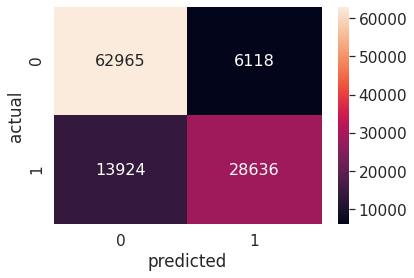

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score ,average_precision_score as aps
#import pickle
#lr_model = pickle.load(open("/content/drive/My Drive/CASE Studies/healthcare/model_linear.pkl", 'rb'))

lr_model.fit(x_train,y_train)
pred=lr_model.predict(x_test)
score=precision_score(y_test,pred)
report=classification_report(y_test,pred)
micro_precision=precision_score(y_test,pred,average='micro')
macro_precision=precision_score(y_test,pred,average='macro')

print(f"Precision_score={score}, micro_precision={micro_precision} ,macro_precision={macro_precision}")

print("CLASSIFICATION REPORT",report)


conf_matr_train = pd.DataFrame(confusion_matrix(y_test, pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("predicted")
plt.ylabel("actual")



In [ ]:
import pickle
with open("/content/drive/My Drive/CASE Studies/healthcare/model_linear.pkl", 'wb') as file:
    pickle.dump(lr_model, file)


In [11]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
params={'max_depth':[5,10,30,50],
'min_samples_split':[2,3,5,10],
'criterion':['gini','entropy']}
dt=DecisionTreeClassifier(class_weight="balanced")

cv=RandomizedSearchCV(dt,param_distributions=params ,cv=5 ,n_iter=10,n_jobs=-1,verbose=2)
cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 30, 50],
                                        'min_samples_split': [2, 3, 5, 10]},
                   verbose=2)

In [12]:
print("The best parameters are ",cv.best_params_)
tree_model=cv.best_estimator_


The best parameters are  {'min_samples_split': 5, 'max_depth': 30, 'criterion': 'entropy'}


Precision_score=0.9761581020255063, micro_precision=0.9826410970683339,macro_precision=0.9814038803284213
CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.99      0.99      0.99     69083
           1       0.98      0.98      0.98     42560

    accuracy                           0.98    111643
   macro avg       0.98      0.98      0.98    111643
weighted avg       0.98      0.98      0.98    111643



Text(26.5, 0.5, 'actual')

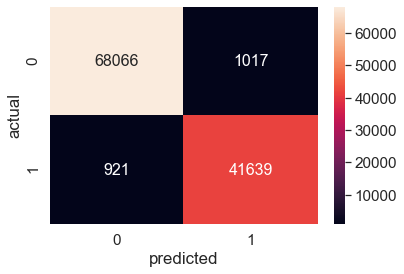

In [13]:
import seaborn as sns
#tree_model = pickle.load(open("/content/drive/My Drive/CASE Studies/healthcare/tree_model.pkl", 'rb'))
from sklearn.metrics import confusion_matrix,classification_report,precision_score ,average_precision_score as aps

pred=tree_model.predict(x_test)
score=precision_score(y_test,pred)

report=classification_report(y_test,pred)
micro_precision=precision_score(y_test,pred,average='micro')
macro_precision=precision_score(y_test,pred,average='macro')
print(f"Precision_score={score}, micro_precision={micro_precision},macro_precision={macro_precision}")


print("CLASSIFICATION REPORT",report)

conf_matr_train = pd.DataFrame(confusion_matrix(y_test, pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("predicted")
plt.ylabel("actual")


In [14]:
import pickle
with open("Dtree.pkl", 'wb') as file:
    pickle.dump(tree_model, file)
  

##XGBoostClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV        
xgb = XGBClassifier()
param = {'learning_rate':[0.01,0.03,00.05,0.1],'n_estimators':[10,50,100,500,1000],'max_depth':[3,5,10],'colsample_bytree':[0.1,0.3,0.5,1],'subsample':[0.1,0.3,0.5,1] }
cv = RandomizedSearchCV(xgb,param,cv=5,n_jobs=-1,verbose=10)
cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 67.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 124.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 164.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 211.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [ ]:
print("The best parameters are ",cv.best_params_)
model_xgb=cv.best_estimator_

The best parameters are  {'subsample': 0.3, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.3}


Precision_score=0.9928928730622555, micro_precision=0.9753499995521439 , macro_precision=0.9791508611111925
CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.97      1.00      0.98     69083
           1       0.99      0.94      0.97     42560

    accuracy                           0.98    111643
   macro avg       0.98      0.97      0.97    111643
weighted avg       0.98      0.98      0.98    111643



Text(25.5, 0.5, 'actual')

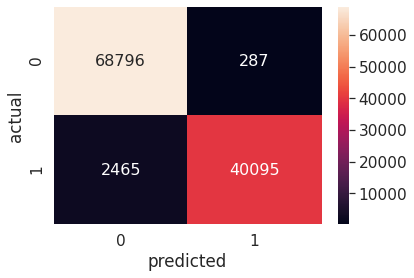

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score ,average_precision_score as aps ,plot_confusion_matrix
import pickle
model_xgb = pickle.load(open("/content/drive/My Drive/CASE Studies/healthcare/XGB_model.pkl", 'rb'))

pred=model_xgb.predict(x_test)
score=precision_score(y_test,pred)

report=classification_report(y_test,pred)
micro_precision=precision_score(y_test,pred,average='micro')
macro_precision=precision_score(y_test,pred,average='macro')

print(f"Precision_score={score}, micro_precision={micro_precision} , macro_precision={macro_precision}")

print("CLASSIFICATION REPORT",report)

conf_matr_train = pd.DataFrame(confusion_matrix(y_test, pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("predicted")
plt.ylabel("actual")


In [ ]:
import pickle
with open("/content/drive/My Drive/CASE Studies/healthcare/XGB_model.pkl", 'wb') as file:
    pickle.dump(model_xgb, file)


#CUSTOM MODELS

In [ ]:
#1 splitting the dataset in (80-20)   
#2 splitting traing data into (50-50)
train_d1,train_d2,test_d1,test_d2=train_test_split(x_train,y_train,test_size=0.5)

In [ ]:
import random
def generating_samples(input_data, target_data):
  
  row_samples=random.sample(range(0,input_data.shape[0]),int((60/100)*(input_data.shape[0])))
  row_repl=random.sample(row_samples,int((40/100)*(input_data.shape[0])))
  rows=row_samples+row_repl
  cols=random.sample(range(0,input_data.shape[1]),random.randrange(3,34))

  a=input_data.iloc[rows]
  a=a.iloc[:,cols]
  b=target_data.iloc[rows]

  return a,b,rows,cols

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score ,average_precision_score as aps
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
def custom_model(samples,m):
  input=[]
  output=[]
  rows=[]
  cols=[]
  for i in range(samples):
    a,b,r,c=generating_samples(train_d1,test_d1)   # generating samples
    input.append(a)
    output.append(b)
    rows.append(r)
    cols.append(c)
  
  base_models=[]
  for i in range(samples):
    x_tr=input[i]
    y_tr=output[i]
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=50,min_samples_split=10)# creating k base models
    dt.fit(x_tr,y_tr)
    base_models.append(dt)

  # passing D2 to these k models
  prediction_for_d2=[]
  for i in range(samples):
    pred=base_models[i].predict(train_d2.iloc[:,cols[i]])
    prediction_for_d2.append(pred)
  prediction_for_d2 = np.array(prediction_for_d2).transpose()

  # predicting X_test data using k models
  prediction_for_x_test=[]
  for i in range(samples):
    p=base_models[i].predict(x_test.iloc[:,cols[i]])
    prediction_for_x_test.append(p)
  prediction_for_x_test = np.array(prediction_for_x_test).transpose()

  
  if m==1:
    # meta model as SGD
    lr=SGDClassifier(class_weight='balanced',loss="log" )
    param={ 'alpha':[0.0001,0.001,0.01,0.1,1,10,100],
          'penalty':["l1","l2"]}
    cv=RandomizedSearchCV(lr,param_distributions=param ,cv=5 ,n_iter=10,n_jobs=-1,verbose=2)
    cv.fit(prediction_for_d2,test_d2)
    print("\n Bestparameters are :",cv.best_params_)

  if m==2:
    # meta model as DecisionTree
    params={'max_depth':[5,10,30,50],
            'min_samples_split':[2,3,5,10],
            'criterion':['gini','entropy']}
    dt=DecisionTreeClassifier(class_weight="balanced")
    cv=RandomizedSearchCV(dt,param_distributions=params ,cv=10 ,n_iter=10,n_jobs=-1,verbose=2)
    cv.fit(prediction_for_d2,test_d2)
    print("\n Bestparameters are :",cv.best_params_)

  if m==3:
    # meta model as XGBoost 
    xgb = XGBClassifier()
    param = {'learning_rate':[0.01,0.03,00.05,0.1],
             'n_estimators':[10,50,100,500,1000],
             'max_depth':[3,5,10],
             'colsample_bytree':[0.1,0.3,0.5,1],
             'subsample':[0.1,0.3,0.5,1] }
    cv = RandomizedSearchCV(xgb,param,cv=5,n_jobs=-1,verbose=10)
    cv.fit(prediction_for_d2,test_d2)
    print("\n Bestparameters are :",cv.best_params_)

  
  model=cv.best_estimator_
  pred=model.predict(prediction_for_x_test)
  score=precision_score(y_test,pred)
  report=classification_report(y_test,pred)
  micro_precision=precision_score(y_test,pred,average='micro')
  macro_precision=precision_score(y_test,pred,average='macro')

  print(f"\n Precision_score={score}, micro_precision={micro_precision} ,macro_precision={macro_precision}")

  print("\n CLASSIFICATION REPORT",report)
  
  conf_matr_train = pd.DataFrame(confusion_matrix(y_test, pred), range(2),range(2))
  sns.set(font_scale=1.4)
  sns.heatmap(conf_matr_train, annot=True,annot_kws={"size": 16}, fmt='g')
  plt.xlabel("predicted")
  plt.ylabel("actual")

  return model ,base_models,cols

##SGD as Meta Model with 30 samples

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.3s finished



 Bestparameters are : {'penalty': 'l1', 'alpha': 0.001}

 Precision_score=0.9893556493290977, micro_precision=0.9885707120016481 ,macro_precision=0.9887248438551738

 CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.99      0.99      0.99     69083
           1       0.99      0.98      0.98     42560

    accuracy                           0.99    111643
   macro avg       0.99      0.99      0.99    111643
weighted avg       0.99      0.99      0.99    111643



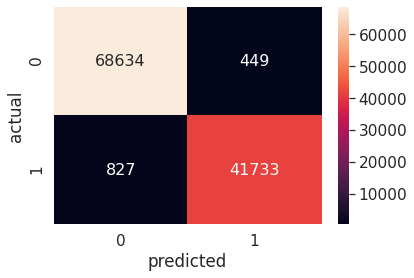

In [ ]:
m,models,cols=custom_model(30,1)

In [ ]:
import pickle
with open("/content/drive/My Drive/CASE Studies/healthcare/lr_meta_model.pkl", 'wb') as file:
    pickle.dump(m, file)


#DecisionTreeClassifier as meta model with 30 samples

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished



 Bestparameters are : {'min_samples_split': 5, 'max_depth': 10, 'criterion': 'entropy'}

 Precision_score=0.9846714292472915, micro_precision=0.985829832591385 ,macro_precision=0.9856036008552478

 CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.99      0.99      0.99     69083
           1       0.98      0.98      0.98     42560

    accuracy                           0.99    111643
   macro avg       0.99      0.98      0.98    111643
weighted avg       0.99      0.99      0.99    111643



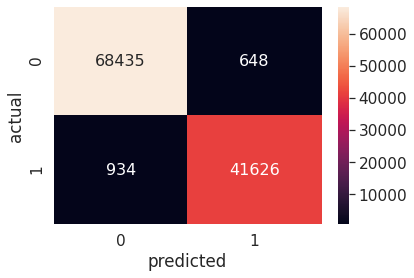

In [ ]:
tree,models,columns=custom_model(30,2)

In [ ]:
import pickle
with open("/content/drive/My Drive/CASE Studies/healthcare/tree_meta_model.pkl", 'wb') as file:
    pickle.dump(tree, file)



XGBClassifier as meta model with 30  samples

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 32.1min finished



 Bestparameters are : {'subsample': 0.1, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 1}

 Precision_score=0.9849686748135973, micro_precision=0.9834920236826312 ,macro_precision=0.9837854398413416

 CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.98      0.99      0.99     69083
           1       0.98      0.97      0.98     42560

    accuracy                           0.98    111643
   macro avg       0.98      0.98      0.98    111643
weighted avg       0.98      0.98      0.98    111643



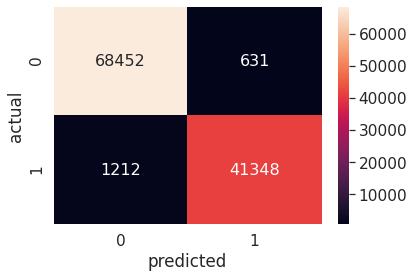

In [ ]:
xg,models,cols=custom_model(30,3)

# for testing Data using Decision tree as Meta model

In [ ]:
#This function takes the x and y the data i.e independent variables and dependent variables

def make_pred(data_train,data_test):
  meta = pickle.load(open("/content/drive/My Drive/CASE Studies/healthcare/tree_meta_model.pkl", 'rb'))
  samples=30
  test_data_pred=[]
  for i in range(samples):
    p=models[i].predict(data_train.iloc[:,columns[i]])
    test_data_pred.append(p)
  test_data_pred = np.array(test_data_pred).transpose()
  
  pred=meta.predict(test_data_pred)
  score=precision_score(data_test,pred)
  report=classification_report(data_test,pred)
  micro_precision=precision_score(data_test,pred,average='micro')
  macro_precision=precision_score(data_test,pred,average='macro')

  print(f"\n Precision_score={score}, micro_precision={micro_precision} ,macro_precision={macro_precision}")
  print("\n CLASSIFICATION REPORT",report)
  
  conf_matr_train = pd.DataFrame(confusion_matrix(data_test, pred), range(2),range(2))
  sns.set(font_scale=1.4)
  sns.heatmap(conf_matr_train, annot=True,annot_kws={"size": 16}, fmt='g')
  plt.xlabel("predicted")
  plt.ylabel("actual")

  return pred

  


 Precision_score=1.0, micro_precision=1.0 ,macro_precision=1.0

 CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



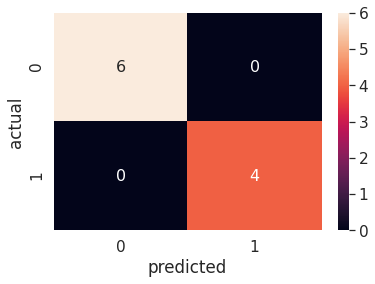

In [ ]:
import pickle
data_train=x_test.iloc[10:20]
data_test=y_test.iloc[10:20]
out=make_pred(data_train,data_test)

In [ ]:
out

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Precision", "Micro_Precision"]
x.add_row(["SGD CLASSIFIER",0.82 , 0.82])
x.add_row(["Decision Tree Classifier", 0.98, 0.98])
x.add_row(["XGBoost Classifier", 0.99, 0.97])
x.add_row(["Meta model as SGD",0.98,0.98])
x.add_row(["Meta model as DT",0.98,0.98])
x.add_row(["Meta model as XGB",0.98,0.98])
print(x)

+--------------------------+-----------+-----------------+
|          Model           | Precision | Micro_Precision |
+--------------------------+-----------+-----------------+
|      SGD CLASSIFIER      |    0.82   |       0.82      |
| Decision Tree Classifier |    0.97   |       0.98      |
|    XGBoost Classifier    |    0.99   |       0.97      |
|    Meta model as SGD     |    0.98   |       0.98      |
|     Meta model as DT     |    0.98   |       0.98      |
|    Meta model as XGB     |    0.98   |       0.98      |
+--------------------------+-----------+-----------------+
